<a href="https://colab.research.google.com/github/Richajaishwal0/meroNotes/blob/main/ML_exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as  pd
import numpy as np

In [ ]:
data= { 'Weight': [79, 69, 73, 95, 82, 55, 69, 71, 64, 69],
    'Height': [1.80, 1.68, 1.82, 1.70, 1.87, 1.55, 1.50, 1.78, 1.67, 1.64],
    'Age': [35, 39, 25, 27, 55, 18, 89, 42, 16, 52],
    'Gender': ['Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female']
}

In [ ]:
df=pd.DataFrame(data)
df.head()

,Weight,Height,Age,Gender
0,79,1.80,35,Male
1,69,1.68,39,Male
2,73,1.82,25,Male
3,95,1.70,27,Male
4,82,1.87,55,Male


# Checking the null values

In [ ]:
df.isnull().sum()


,0
Weight,0
Height,0
Age,0
Gender,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


# Encoding the categorical column

In [ ]:
# Encode the 'Gender' categorical variable
le = LabelEncoder()
df['Gender_encoded'] = le.fit_transform(df['Gender'])  # Male=1, Female=0


In [ ]:
# Define independent variables (X) and dependent variable (y)
X = df[['Height', 'Age', 'Gender_encoded']]
y = df['Weight']

In [ ]:
# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Optional: show predictions vs actual
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(result)

Coefficients: [ 0.23387564  0.13253284 18.16276173]
Intercept: 58.96193109921947
Mean Squared Error: 96.85135262682385
R^2 Score: -14.496216420291816
   Actual  Predicted
8      64  61.473029
1      69  82.686385


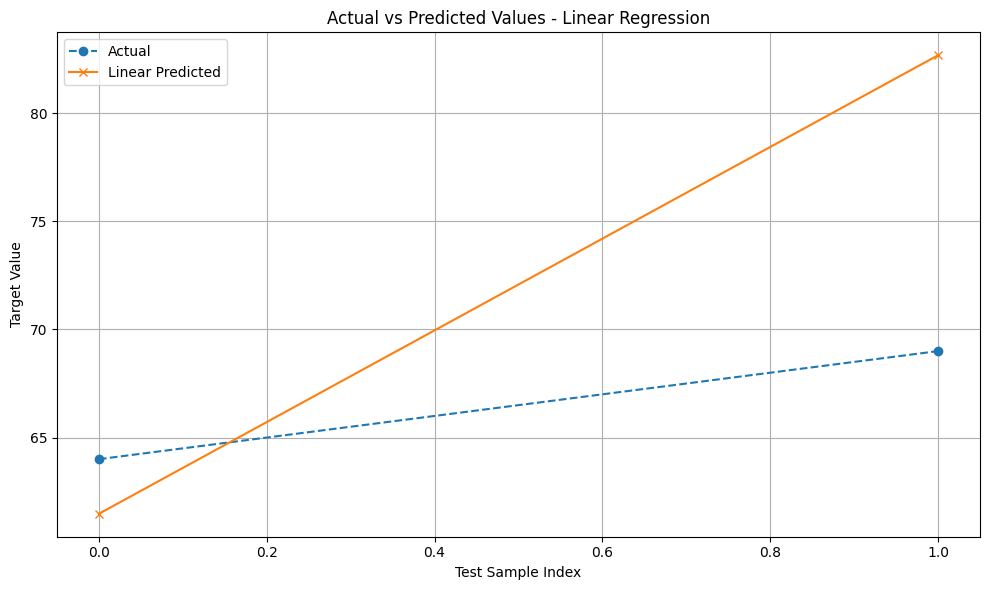

In [ ]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))

# Plot Actual values
plt.plot(y_test.values, label='Actual', marker='o', linestyle='--')

# Plot Predicted values from Linear Regression
plt.plot(y_pred, label='Linear Predicted', marker='x')

# Add labels and title
plt.title("Actual vs Predicted Values - Linear Regression")
plt.xlabel("Test Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#Using ridge regression as to improve model performance


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

ridge = Ridge(alpha=1.0)  # start with alpha=1.0
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [ ]:
print("Ridge R²:", r2_score(y_test, y_pred))
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Ridge R²: -14.496216420291816
Ridge RMSE: 9.841308481438018


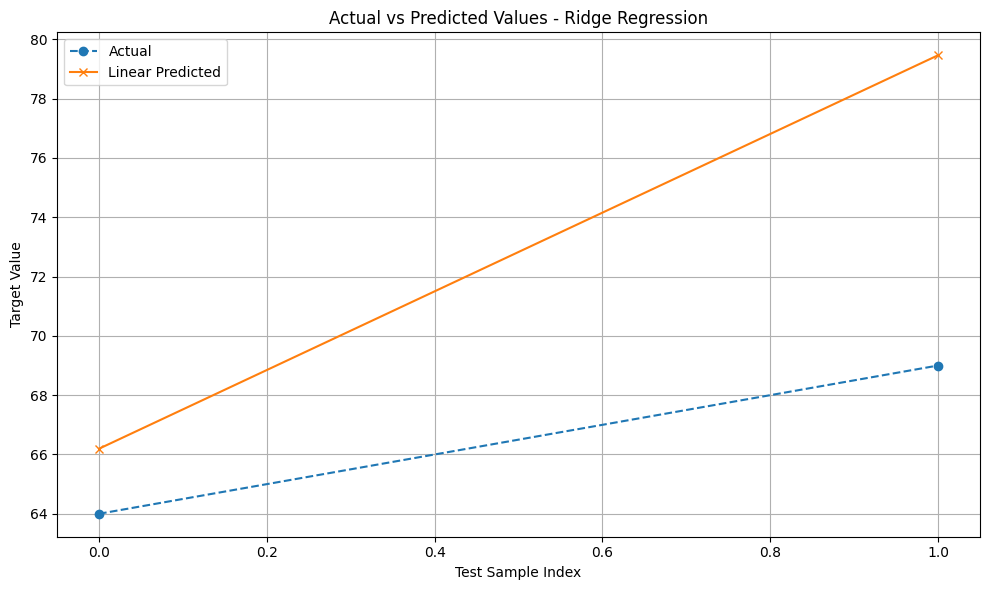

In [ ]:

# Create the plot
plt.figure(figsize=(10, 6))

# Plot Actual values
plt.plot(y_test.values, label='Actual', marker='o', linestyle='--')

# Plot Predicted values from Linear Regression
plt.plot(y_pred_ridge, label='Linear Predicted', marker='x')

# Add labels and title
plt.title("Actual vs Predicted Values - Ridge Regression")
plt.xlabel("Test Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import Lasso

🔹 Lasso Regression Results
Mean Squared Error: 93.53687685188274
R² Score: -13.965900296301237


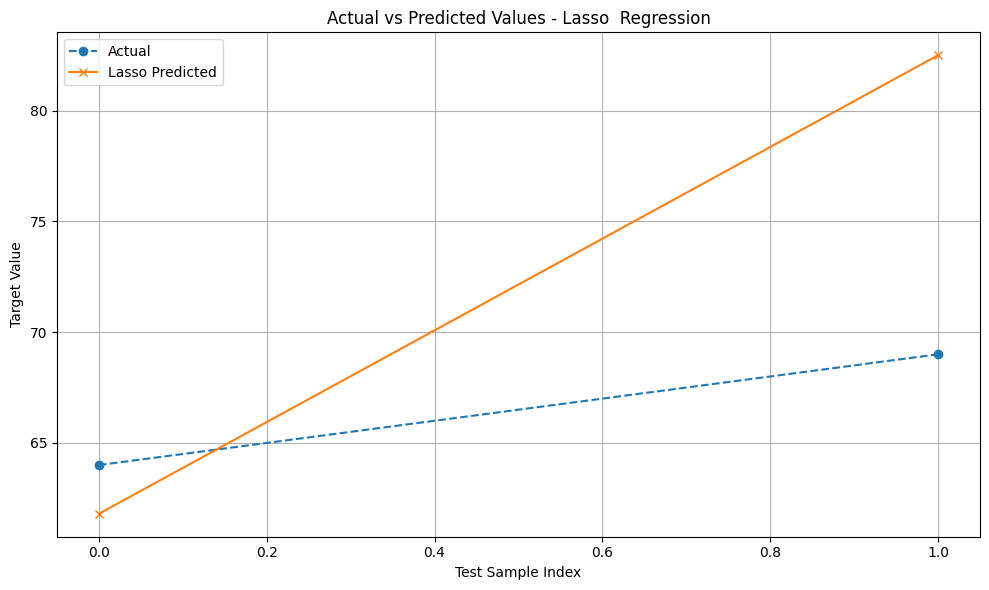

In [ ]:
# Initialize and train the Lasso model
lasso_model = Lasso(alpha=0.1)  # You can tune alpha as needed
lasso_model.fit(X_train, y_train)

# Make predictions
lasso_pred = lasso_model.predict(X_test)

# Evaluation
print("🔹 Lasso Regression Results")
print("Mean Squared Error:", mean_squared_error(y_test, lasso_pred))
print("R² Score:", r2_score(y_test, lasso_pred))

# Create the plot
plt.figure(figsize=(10, 6))

# Plot Actual values
plt.plot(y_test.values, label='Actual', marker='o', linestyle='--')

# Plot Predicted values from Linear Regression
plt.plot(lasso_pred, label='Lasso Predicted', marker='x')

# Add labels and title
plt.title("Actual vs Predicted Values - Lasso  Regression")
plt.xlabel("Test Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
